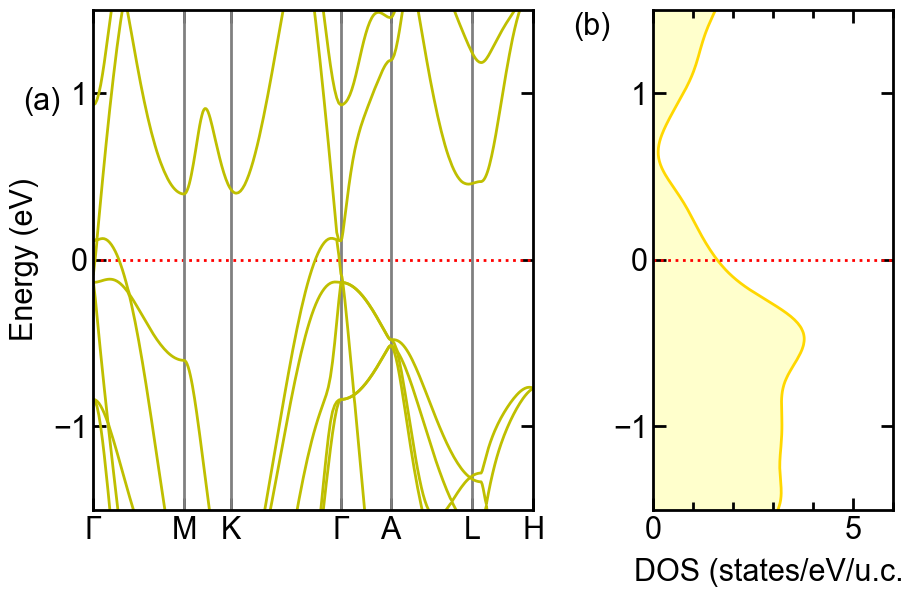

In [6]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('matplotlib/sci.mplstyle')
import numpy as np
import matplotlib as mpl

# Initialize figure
fig = plt.figure(figsize=(8, 5))

# Add two axes objects to create a paneled figure
# format: (originX, originY, widthX, widthY)
axBand = fig.add_axes([0,    0, 0.55, 1])
axDOS  = fig.add_axes([0.70, 0, 0.30, 1])

# PLOT EBANDS

# The Fermi energy, find it in scf.out
efermi =  7.2959

# Load data from gr.bands.gnu
data = np.loadtxt('bands/Mg3Bi2.bands.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))
    
# Set high-symmetry points from nscf.in
gG1 = k[0]; M = k[50]; K = k[95]; gG2=k[150]; A=k[200]; L=k[245] ; H = k[300]

# Plot dotted line at Fermi energy
axBand.axhline(0, c='red', ls=':')
# Plot dotted lines at high-symmetry points
axBand.axvline(M, c='gray')
axBand.axvline(K, c='gray')
axBand.axvline(gG2, c='gray')
axBand.axvline(A, c='gray')
axBand.axvline(L, c='gray')

# Plot band structure
for band in range(len(bands)):
    axBand.plot(k, bands[band, :]-efermi, c='y')

# Add the x and y-axis labels
#axBand.set_xlabel('High-symmetry points')
axBand.set_ylabel('Energy (eV)')
# Set the axis limits
axBand.set_xlim(gG1, H)
axBand.set_ylim (-1.5, 1.5)
# Add labels for high-symmetry points
axBand.set_xticks([gG1, M, K, gG2, A, L ,H], ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L' ,'H'])
# Hide x-axis minor ticks
axBand.tick_params(axis='x', which='minor', bottom=False, top=False)
# Better ticks for y-axis
axBand.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axBand.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))

# PLOT DOS

# The Fermi energy, find it in header row of gr.dos
efermi1 = 7.311
#efermi = 0

# Open and read the file gr.dos
ener, dos, idos = np.loadtxt('bands/Mg3Bi2.dos', unpack=True)
    
# Plot the DOS, in which the Fermi energy shifts to zero
axDOS.plot(dos, ener-efermi1, color='gold')
axDOS.fill_betweenx(ener-efermi1, 0, dos, facecolor='yellow', alpha=0.2)


# Plot dotted line at Fermi energy
axDOS.axhline(0, c='red', ls=':')

# Add the x and y-axis labels
axDOS.set_xlabel('DOS (states/eV/u.c.)')
#axDOS.set_ylabel('Energy (eV)')
# Set the axis limits
axDOS.set_xlim(0,6)
axDOS.set_ylim(-1.5, 1.5)
# Better ticks for y-axis
axDOS.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axDOS.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))

# ADD PANEL LABELS (a) AND (b)
axBand.text(-0.45, 0.9,'(a)')
axDOS.text( -2, 1.35,'(b)')

plt.savefig('plot-merge.pdf', bbox_inches='tight')
